 **Import required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

**Load the dataset and Preview the data**

In [ ]:
df = pd.read_csv("WorldBankGroup.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


**Transform: Wide to Long Format**

In [ ]:
df_long = df.melt(
    id_vars=["Country Name"],
    value_vars=[str(year) for year in range(1960, 2023)],
    var_name="Year",
    value_name="Population"
)
df_long.dropna(inplace=True)
df_long.head()

,Country Name,Year,Population
0,Aruba,1960,54922.0
1,Africa Eastern and Southern,1960,130072080.0
2,Afghanistan,1960,9035043.0
3,Africa Western and Central,1960,97630925.0
4,Angola,1960,5231654.0


**Bar Chart — Top 10 Populated Countries in 2022**

<ipython-input-8-ba3f6cb756de>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2022_sorted.head(10), x="Population", y="Country Name", palette="Blues_d")


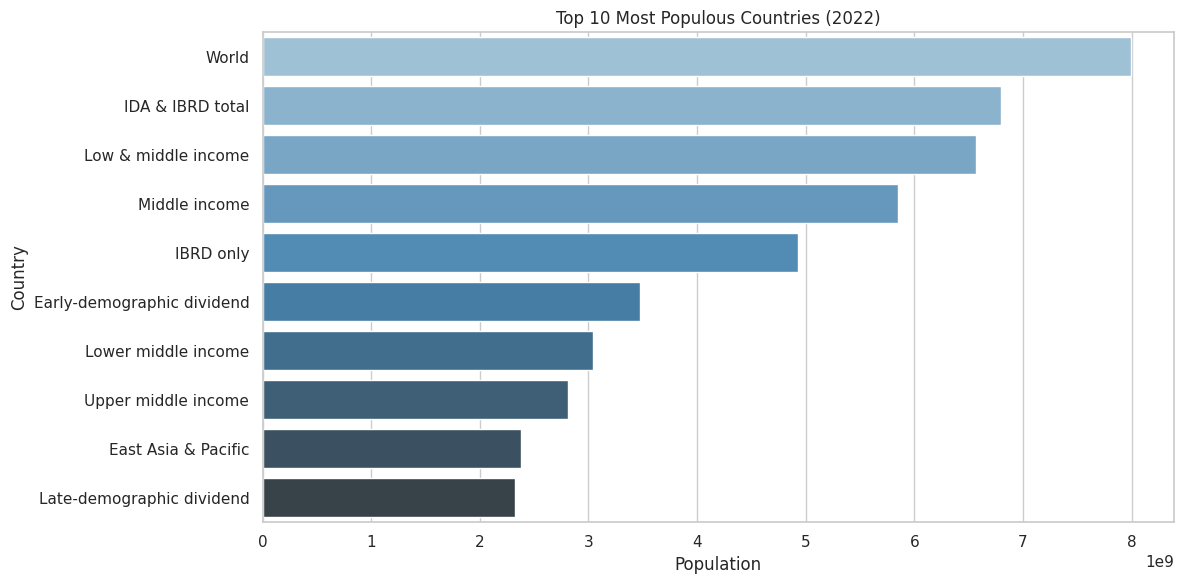

In [ ]:
df_2022 = df_long[df_long["Year"] == "2022"]
df_2022_sorted = df_2022.sort_values("Population", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_2022_sorted.head(10), x="Population", y="Country Name", palette="Blues_d")
plt.title("Top 10 Most Populous Countries (2022)")
plt.xlabel("Population")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**Histogram — Distribution of Countries by Population (2022)**

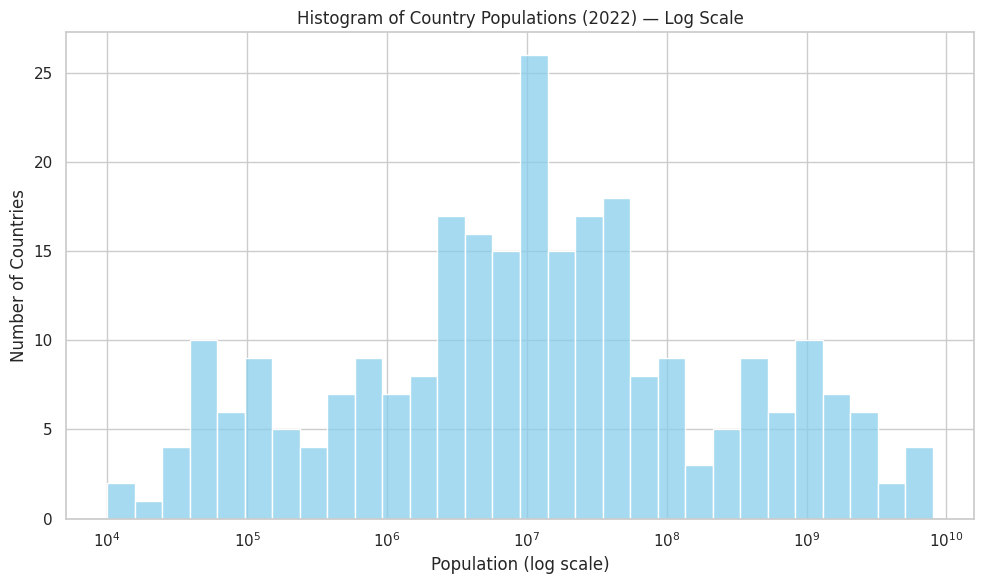

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_2022["Population"], bins=30, kde=False, color="skyblue", log_scale=True)
plt.title("Histogram of Country Populations (2022) — Log Scale")
plt.xlabel("Population (log scale)")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()